In [1]:
import math
import nltk
%matplotlib inline

In [2]:
# classifications
papers = {
    'Madison': [10, 14, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
    'Hamilton': [1, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 21, 22, 23, 24,
                 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 59, 60,
                 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
                 78, 79, 80, 81, 82, 83, 84, 85],
    'Jay': [2, 3, 4, 5, 64],
    'Shared': [18, 19, 20],
    'Disputed': [51, 52, 53, 54, 55, 56, 57, 58, 62, 63],
    'TestPaper1': [49],
    'TestPaper2': [50]
}

For this project, we will be utilizing Mendenhall’s Characteristic Curves of Composition, Kilgariff’s Chi-Squared Method & John Burrows’ Delta Method to compare two disputed texts from the famous Federalist Papers collection to determine the potential authorship. For historical context, of the 85 total papers, 51 are known to have been written by Alexander Hamilton, 14 were written by James Madison, 5 by John Jay, 3 co-written by Madison and Hamilton (Madison clamed primary authorship), and the remaining 12 are disputed between Hamilton and Madison. Our investigation will focus on Federalist Papers 49 and 50, two of the disputed collection whose authorship is debated between Hamilton and Madison. 

In [3]:
def read_files_into_string(filenames):
    strings = []
    for filename in filenames:
        with open(f'data/federalist_{filename}.txt') as file:
            strings.append(file.read())
    return '\n'.join(strings)

In [4]:
# create dictionary out of the authors' corpora (collection of written text)
papers_by_author = {}

for author, files in papers.items():
    papers_by_author[author] = read_files_into_string(files)

We first read in the 85 total papers, utilizing our consistent naming scheme to simplify the import process. We will utilize an author dictionary to make selecting the correct corpora easier, as we want to be utilizing only papers for which authorship is fairly well-established. Now, we are ready to begin determining the true authorship of our two test papers. To do so, we will begin by viewing the Characteristic Curves of Composition for our two test papers, and compare them to the characteristic curves of the papers for which authorship has already been determined. 

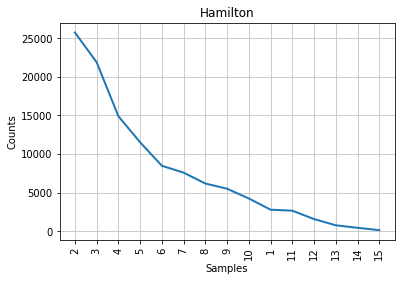

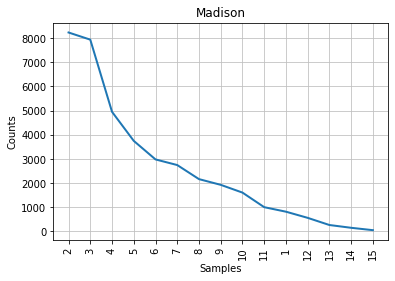

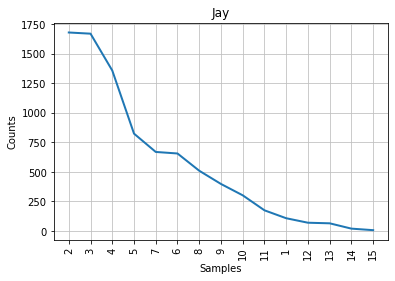

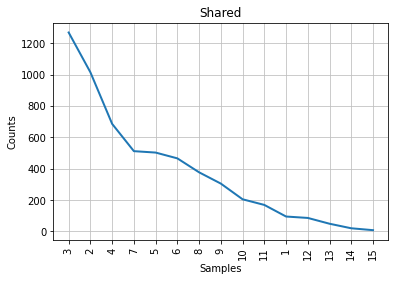

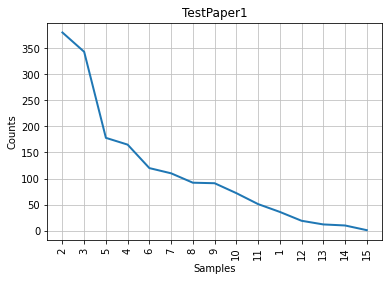

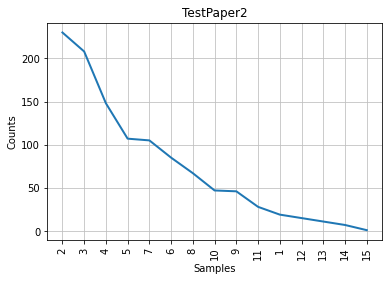

In [5]:
# list authors & test papers to create characteristic curves for
authors = ("Hamilton", "Madison", "Jay", "Shared", "TestPaper1", "TestPaper2")

papers_by_author_tokens = {}
papers_by_author_length_distributions = {}

# create list of word tokens for each author and test paper
for author in authors:
    tokens = nltk.word_tokenize(papers_by_author[author])

    papers_by_author_tokens[author] = ([token for token in tokens
                                            if any(c.isalpha() for c in token)])

    token_lengths = [len(token) for token in papers_by_author_tokens[author]]
    papers_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)
    papers_by_author_length_distributions[author].plot(15,title=author)

From our characteristic curves, we can see that initial similarities point towards Madison being the true author, as for both test paper 49 and 50, the characteristic curves appear taper in ways more consistent with Madison than Hamilton. We do see, however, that there are similarities to Hamilton's curve as well, meaning that further investigation will be necessary. To do so, we will now review the Chi-Squared results for the two papers, compared to the two authors. 

In [6]:
# list authors to compare Chi-Squared results for Paper 49
authors = ("Hamilton", "Madison")

for author in authors:
    
    # make sure to set all words to lowercase
    papers_by_author_tokens[author] = (
        [token.lower() for token in papers_by_author_tokens[author]])
    
papers_by_author_tokens["TestPaper1"] = (
    [token.lower() for token in papers_by_author_tokens["TestPaper1"]])

for author in authors:

    # create joint corpus that holds 500 most common words
    joint_corpus = (papers_by_author_tokens[author] +
                    papers_by_author_tokens["TestPaper1"])
    joint_freq_dist = nltk.FreqDist(joint_corpus)
    most_common = list(joint_freq_dist.most_common(500))

    author_share = (len(papers_by_author_tokens[author])
                    / len(joint_corpus))
    chisquared = 0
    
    for word,joint_count in most_common:

        # compare joint corpus word count to paper 49's
        author_count = papers_by_author_tokens[author].count(word)
        disputed_count = papers_by_author_tokens["TestPaper1"].count(word)

        expected_author_count = joint_count * author_share
        expected_disputed_count = joint_count * (1-author_share)

        chisquared += ((author_count-expected_author_count) *
                       (author_count-expected_author_count) /
                       expected_author_count)

        chisquared += ((disputed_count-expected_disputed_count) *
                       (disputed_count-expected_disputed_count)
                       / expected_disputed_count)

    print("The Chi-squared statistic for candidate", author, "is", chisquared)

The Chi-squared statistic for candidate Hamilton is 1115.958312438872
The Chi-squared statistic for candidate Madison is 831.2520107578055


In [7]:
# list authors to compare Chi-Squared results for Paper 50
authors = ("Hamilton", "Madison")

for author in authors:
    
    # make sure to set all words to lowercase
    papers_by_author_tokens[author] = (
        [token.lower() for token in papers_by_author_tokens[author]])
    
papers_by_author_tokens["TestPaper2"] = (
    [token.lower() for token in papers_by_author_tokens["TestPaper2"]])

for author in authors:

    # create joint corpus that holds 500 most common words
    joint_corpus = (papers_by_author_tokens[author] +
                    papers_by_author_tokens["TestPaper2"])
    joint_freq_dist = nltk.FreqDist(joint_corpus)
    most_common = list(joint_freq_dist.most_common(500))

    author_share = (len(papers_by_author_tokens[author])
                    / len(joint_corpus))
    chisquared = 0
    for word,joint_count in most_common:
        
        # compare joint corpus word count to paper 50's
        author_count = papers_by_author_tokens[author].count(word)
        disputed_count = papers_by_author_tokens["TestPaper2"].count(word)

        expected_author_count = joint_count * author_share
        expected_disputed_count = joint_count * (1-author_share)

        chisquared += ((author_count-expected_author_count) *
                       (author_count-expected_author_count) /
                       expected_author_count)

        chisquared += ((disputed_count-expected_disputed_count) *
                       (disputed_count-expected_disputed_count)
                       / expected_disputed_count)

    print("The Chi-squared statistic for candidate", author, "is", chisquared)

The Chi-squared statistic for candidate Hamilton is 1061.104045049614
The Chi-squared statistic for candidate Madison is 898.0890397562158


From our Chi-squared method investigation, we see that for Federalist Paper 49, the statistic for Hamilton is 1115.958, while the statistic for Madison is 831.252. We also note that the statistics appear similar for Federalist Paper 50, with Hamilton's chi-squared statistic measured at 1061.104 and Madison's at 898.089. This appears to confirm our previous decision that both papers appear to have been authored by James Madison. To confirm this, we will utilize the Delta Method to finalize our decision.

In [8]:
# list authors needed to utilize Delta method
authors = ("Hamilton", "Madison", "Jay", "Shared")

papers_by_author_tokens = {}

for author in authors:
    tokens = nltk.word_tokenize(papers_by_author[author])

    # filter out punctuation
    papers_by_author_tokens[author] = ([token for token in tokens
                                            if any(c.isalpha() for c in token)])
# make sure all words are lowercase
for author in authors:
    papers_by_author_tokens[author] = (
        [tok.lower() for tok in papers_by_author_tokens[author]])

whole_corpus = []
for author in authors:
    whole_corpus += papers_by_author_tokens[author]

# create frequency distribution
whole_corpus_freq_dist = list(nltk.FreqDist(whole_corpus).most_common(30))

In [9]:
# creare feature frequency dictionary
features = [word for word,freq in whole_corpus_freq_dist]
feature_freqs = {}

for author in authors:
    feature_freqs[author] = {}

    overall = len(papers_by_author_tokens[author])

    for feature in features:
        presence = papers_by_author_tokens[author].count(feature)
        feature_freqs[author][feature] = presence / overall

With the feature frequencies we created, we can find the so-called 'mean of means', or the mean of the features as derived from the feature means within each subcorpus. 

In [10]:
# total corpus statistics dictionary
corpus_features = {}

for feature in features:
    # create sub-dictionary to store feature mean & standard deviation for each author
    corpus_features[feature] = {}

    # calculate mean
    feature_average = 0
    for author in authors:
        feature_average += feature_freqs[author][feature]
    feature_average /= len(authors)
    corpus_features[feature]["Mean"] = feature_average

    # calculate standard deviation
    feature_stdev = 0
    for author in authors:
        diff = feature_freqs[author][feature] - corpus_features[feature]["Mean"]
        feature_stdev += diff*diff
    feature_stdev /= (len(authors) - 1)
    feature_stdev = math.sqrt(feature_stdev)
    corpus_features[feature]["StdDev"] = feature_stdev

In [11]:
# transform feature frequencies into z-scores to determine how far from corpus mean each observation is 
feature_z_scores = {}
for author in authors:
    feature_z_scores[author] = {}
    
    for feature in features:
        feature_val = feature_freqs[author][feature]
        feature_mean = corpus_features[feature]["Mean"]
        feature_stdev = corpus_features[feature]["StdDev"]
        feature_z_scores[author][feature] = ((feature_val-feature_mean) /
                                            feature_stdev)

In [12]:
# tokenize the first test case (Paper 49)
testcase_tokens = nltk.word_tokenize(papers_by_author["TestPaper1"])

# filter out punctuation and lowercase the tokens
testcase_tokens = [token.lower() for token in testcase_tokens
                   if any(c.isalpha() for c in token)]

# calculate the test case's features
overall = len(testcase_tokens)
testcase_freqs = {}
for feature in features:
    presence = testcase_tokens.count(feature)
    testcase_freqs[feature] = presence / overall

# calculate the test case's feature z-scores
testcase_z_scores = {}
for feature in features:
    feature_val = testcase_freqs[feature]
    feature_mean = corpus_features[feature]["Mean"]
    feature_stdev = corpus_features[feature]["StdDev"]
    testcase_z_scores[feature] = (feature_val - feature_mean) / feature_stdev
    print("Test case z-score for feature", feature, "is", testcase_z_scores[feature])

Test case z-score for feature the is 0.9316590297969845
Test case z-score for feature of is 0.5381688704417538
Test case z-score for feature to is 0.2725978814155455
Test case z-score for feature and is -0.9354678177819121
Test case z-score for feature in is -0.5040916847956923
Test case z-score for feature a is 0.6477517458047474
Test case z-score for feature be is 1.660668426621894
Test case z-score for feature that is -0.2301361555264025
Test case z-score for feature it is 0.9173500760183916
Test case z-score for feature is is 0.4351584919179781
Test case z-score for feature which is 1.1819347025438807
Test case z-score for feature as is -0.06353282181299422
Test case z-score for feature by is -0.37365319518669154
Test case z-score for feature this is -2.273970086946457
Test case z-score for feature would is 2.486121161837412
Test case z-score for feature not is 0.560425461217295
Test case z-score for feature have is -2.857449912686117
Test case z-score for feature or is -0.25269916

In [13]:
# calculate Delta score for each author
for author in authors:
    delta = 0
    for feature in features:
        delta += math.fabs((testcase_z_scores[feature] -
                            feature_z_scores[author][feature]))
    delta /= len(features)
    print( "Delta score for candidate", author, "is", delta )

Delta score for candidate Hamilton is 1.4689777456132578
Delta score for candidate Madison is 1.28718792361914
Delta score for candidate Jay is 1.5774332918041991
Delta score for candidate Shared is 1.644381478808388


Our findings show that Madison has the closest Delta score to our first disputed Paper (Paper 49), with a delta score of 1.2872. 

In [14]:
# tokenize the first test case (Paper 50)
testcase_tokens_2 = nltk.word_tokenize(papers_by_author["TestPaper2"])

# filter out punctuation and lowercase the tokens
testcase_tokens_2 = [token.lower() for token in testcase_tokens_2
                   if any(c.isalpha() for c in token)]

overall_2 = len(testcase_tokens_2)

testcase_freqs_2 = {}

for feature in features:
    presence_2 = testcase_tokens_2.count(feature)
    testcase_freqs_2[feature] = presence_2 / overall_2

testcase_z_scores_2 = {}

for feature in features:
    feature_val_2 = testcase_freqs_2[feature]
    feature_mean = corpus_features[feature]["Mean"]
    feature_stdev = corpus_features[feature]["StdDev"]
    testcase_z_scores_2[feature] = (feature_val_2 - feature_mean) / feature_stdev
    print("Test case z-score for feature", feature, "is", testcase_z_scores_2[feature])

Test case z-score for feature the is 0.07524934005830994
Test case z-score for feature of is -0.3839423242723421
Test case z-score for feature to is -1.4667761391226222
Test case z-score for feature and is -0.5227300120562437
Test case z-score for feature in is 1.4660235349961463
Test case z-score for feature a is -1.0942869844940017
Test case z-score for feature be is 1.6069677135510632
Test case z-score for feature that is -0.6532116513420734
Test case z-score for feature it is 0.4395254905491972
Test case z-score for feature is is -1.3972119316925822
Test case z-score for feature which is -0.7417900538113921
Test case z-score for feature as is 0.2978069125166728
Test case z-score for feature by is -0.261915020839383
Test case z-score for feature this is -0.07037110953378967
Test case z-score for feature would is 1.4009640403351902
Test case z-score for feature not is 1.362112152252185
Test case z-score for feature have is 4.179833480905201
Test case z-score for feature or is 0.15161

In [15]:
# calculate Delta score for each author
for author in authors:
    delta = 0
    for feature in features:
        delta += math.fabs((testcase_z_scores_2[feature] -
                            feature_z_scores[author][feature]))
    delta /= len(features)
    print( "Delta score for candidate", author, "is", delta )

Delta score for candidate Hamilton is 1.4717879831663205
Delta score for candidate Madison is 1.45072308269473
Delta score for candidate Jay is 1.6182955174674958
Delta score for candidate Shared is 1.5514117513844068


Our findings show a much closer difference in Delta scores for Paper 50, with Madison slightly lower than Hamilton at 1.451. From these Delta scores, we can confidently claim that, with a reasonable amount of certainty, Federalist Paper 49 and 50 were both authored by James Madison, not Alexander Hamilton. 